### European climate projections in CORDEX

In [1]:
# before we start, let's import some useful packages
import os
import numpy as np
import xarray as xr
import cordex as cx
import cartopy as cp
import matplotlib.pyplot as plt

In [2]:
'''
Okay! CORDEX, or the Coordinated Regional Downscaling Experiment, is a model intercomparison project 
that uses regional climate models to produce climate projections for many of the world's key regions.
Check out the table below for a full list.
'''

cx.domains.table

,region,long_name,nlon,nlat,ll_lon,ur_lon,ll_lat,ur_lat,dlon,dlat,pollon,pollat
short_name,,,,,,,,,,,,
SAM-44,1,South America,146,167,143.92000,207.72000,-38.28000,34.76000,0.4400,0.4400,-56.06,70.60
CAM-44,2,Central America,210,113,-52.80000,39.16000,-28.60000,20.68000,0.4400,0.4400,113.98,75.74
NAM-44,3,North America,155,130,-33.88000,33.88000,-28.40000,28.36000,0.4400,0.4400,83.00,42.50
EUR-44,4,Europe,106,103,-28.21000,17.99000,-23.21000,21.67000,0.4400,0.4400,-162.00,39.25
AFR-44,5,Africa,194,201,-24.64000,60.28000,-45.76000,42.24000,0.4400,0.4400,180.00,90.00
WAS-44,6,South Asia,193,130,-32.12000,52.36000,-21.56000,35.20000,0.4400,0.4400,-123.34,79.95
EAS-44,7,East Asia,203,167,-40.92000,47.96000,-26.84000,46.20000,0.4400,0.4400,-64.78,77.61
CAS-44,8,Central Asia,153,100,-34.32000,32.56000,-20.68000,22.88000,0.4400,0.4400,-103.39,43.48
AUS-44,9,Australasia,200,129,142.16000,229.72000,-22.88000,33.44000,0.4400,0.4400,141.38,60.31


In [3]:
'''
There are a few regions that cover Europe, but we're going to look at EUR-11.
'''

eur11 = cx.cordex_domain("EUR-11")
eur11

<xarray.Dataset>
Dimensions:                     (rlon: 424, rlat: 412)
Coordinates:
  * rlon                        (rlon) float64 -28.38 -28.27 ... 18.05 18.16
  * rlat                        (rlat) float64 -23.38 -23.27 ... 21.73 21.84
    lon                         (rlat, rlon) float64 -10.06 -9.964 ... 64.96
    lat                         (rlat, rlon) float64 21.99 22.03 ... 66.75 66.69
Data variables:
    rotated_latitude_longitude  int32 0
Attributes:
    CORDEX_domain:  EUR-11

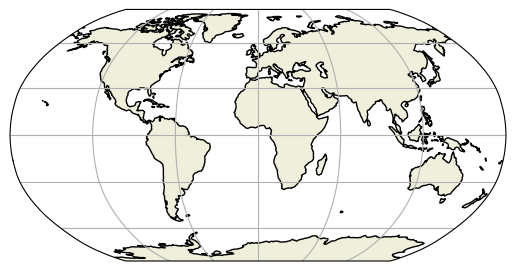

In [4]:
'''
To plot our data, we're going to make extensive use of the cartopy, a python package for 
plotting geospatial data. It works alongside matplotlib to map 2-D arrays onto the Earth 
surface. Before we get into plotting any data, try drawing a quick map. Test out some of 
your other favourite projections! eg:

Mercator
Stereographic
Orthographic
etc
'''

fig = plt.figure()
ax = plt.axes(projection = cp.crs.Robinson())

ax.coastlines()
ax.add_feature(cp.feature.LAND)
#ax.add_feature(cp.feature.OCEAN)
ax.gridlines()

In [19]:
'''
Okay, let's get onto some real climate model data. We're going to use HadREM3, developed by 
the UK Met Office Hadley Centre. In this particular dataset, its boundary conditions at the
edge of the model domain were determined by HadGEM2-ES, the Hadley Centre's Earth System 
Model, which had run these experiments previously on a global scale.

We're going to look at three experiments using this model pair:

 - historical: A simulation of the period 1951-2005
 - rcp2.6: a low-emission scenario to 2100
 - rcp8.5: a high-emission scenario to 2100

Let's start with the obvious model variable to investigate - temperature at the surface (tas)
'''

# get local path to the dataset files
historial_path = '/Users/jonniebarnsley/Data/cordex/EUR-11/tas/historical/r1i1p1/MOHC-HadGEM2-ES/HadREM3-GA7-05/'
rcp26_path = '/Users/jonniebarnsley/Data/cordex/EUR-11/tas/rcp26/r1i1p1/MOHC-HadGEM2-ES/HadREM3-GA7-05/'
rcp85_path = '/Users/jonniebarnsley/Data/cordex/EUR-11/tas/rcp85/r1i1p1/MOHC-HadGEM2-ES/HadREM3-GA7-05/'

In [20]:
def open_dataset(path):
    '''a quick function for easy opening of datasets'''
    filenames = os.listdir(path)
    filepaths = [path+filename for filename in filenames if '.nc' in filename]
    file = xr.open_mfdataset(filepaths)

    return file

In [21]:
historical_file = open_dataset(historial_path)
# take a look at the data recorded in this file
historical_file

<xarray.Dataset>
Dimensions:                     (rlat: 412, rlon: 424, time: 648, bnds: 2,
                                 vertices: 4)
Coordinates:
    height                      float64 1.5
    latitude                    (rlat, rlon) float64 dask.array<chunksize=(412, 424), meta=np.ndarray>
    longitude                   (rlat, rlon) float64 dask.array<chunksize=(412, 424), meta=np.ndarray>
  * rlat                        (rlat) float64 -23.37 -23.26 ... 21.73 21.84
  * rlon                        (rlon) float64 -28.38 -28.27 ... 18.04 18.15
  * time                        (time) object 1951-12-16 00:00:00 ... 2005-11...
Dimensions without coordinates: bnds, vertices
Data variables:
    rlat_bnds                   (time, rlat, bnds) float64 dask.array<chunksize=(109, 412, 2), meta=np.ndarray>
    rlon_bnds                   (time, rlon, bnds) float64 dask.array<chunksize=(109, 424, 2), meta=np.ndarray>
    rotated_latitude_longitude  (time) int32 -2147483647 ... -2147483647
    tas                         (time, rlat, rlon) float32 dask.array<chunksize=(109, 412, 424), meta=np.ndarray>
    time_bnds                   (time, bnds) object dask.array<chunksize=(109, 2), meta=np.ndarray>
    vertices_latitude           (time, rlat, rlon, vertices) float64 dask.array<chunksize=(109, 412, 424, 4), meta=np.ndarray>
    vertices_longitude          (time, rlat, rlon, vertices) float64 dask.array<chunksize=(109, 412, 424, 4), meta=np.ndarray>
Attributes: (12/22)
    model_id:                       MOHC-HadREM3-GA7-05
    driving_experiment_name:        historical
    creation_date:                  2020-01-30T12:55:31Z
    project_id:                     CORDEX
    experiment:                     historical run using HadGEM2-ES as drivin...
    institution:                    MetOffice, Hadley Centre, UK
    ...                             ...
    driving_model_id:               MOHC-HadGEM2-ES
    institute_id:                   MOHC
    frequency:                      mon
    tracking_id:                    hdl:21.14103/8c9d6089-06b2-4ddd-bde9-5183...
    history:                        Thu Mar 26 11:17:43 2020: ncatted -O -a t...
    NCO:                            4.7.3

In [24]:
# extract some data from this file
tas_hist = historical_file.tas-273.15 #kelvin to C
lon = historical_file.longitude
lat = historical_file.latitude

# baseline temperatures here defined as the mean temp between 1951-1970
baseline = tas_hist.sel(time = slice('1951-01-01', '1970-12-30')).mean(dim = 'time')

In [25]:
'''
CORDEX regions are plotted using a rotated pole projection. We can extract the pole coordinates
from the eur11 object we defined earlier using the cordex python package.
'''

pole = (
    eur11.rotated_latitude_longitude.grid_north_pole_longitude,
    eur11.rotated_latitude_longitude.grid_north_pole_latitude,
)
pole

(-162.0, 39.25)

In [26]:
projection = cp.crs.RotatedPole(pole_latitude=pole[1], pole_longitude=pole[0])
transform = cp.crs.PlateCarree() # tells matplotlib this is geospatial data

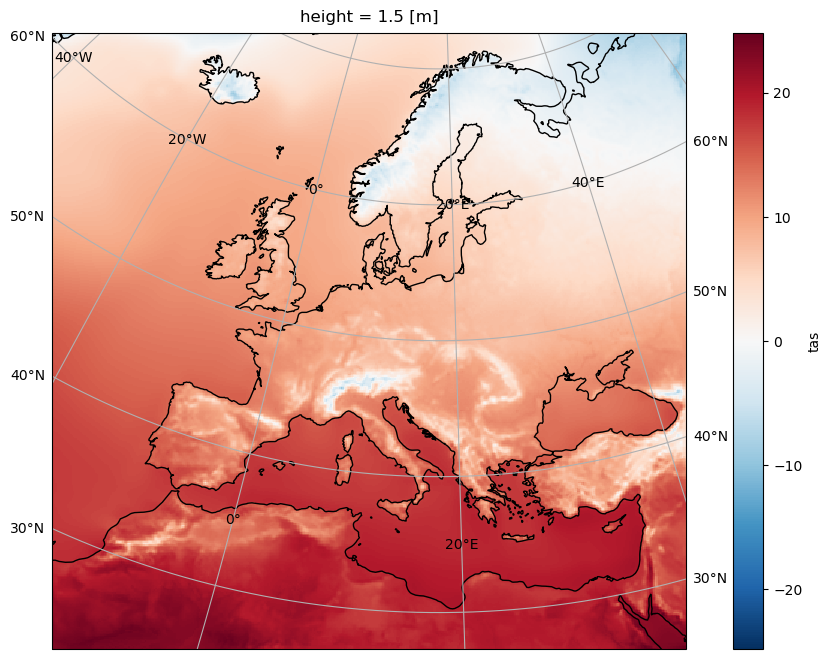

In [27]:
'''
let's plot the average surface temperature in Europe between 1951-1979. What are the
large-scale features you notice?
'''

fig = plt.figure(figsize = (12, 8))
ax = plt.axes(projection = projection)
ax.coastlines(resolution = '50m')
#ax.add_feature(cp.feature.BORDERS)
ax.gridlines(draw_labels=True)

baseline.plot(
    ax=ax,
    cmap='RdBu_r',
    transform=transform,
    x='longitude',
    y='latitude',
    )

In [28]:
'''
We're interested in how these surface temperatures might change towards the end of this
century. Which regions warm the most? How does climate change affect the seasons? What 
impact might this have on the physical landscape and the organisms that inhabit it?

Let's find out!
'''

# repeat a lot of the same steps for the rcp2.6 and rcp8.5 datasets
rcp26_file = open_dataset(rcp26_path)
rcp85_file = open_dataset(rcp85_path)

tas26 = rcp26_file.tas-273.15 #kelvin to C
tas85 = rcp85_file.tas-273.15

# end of the century here defined as the average between 2080-2100
tas26_eoc = tas26.sel(time = slice('2080-01-01', '2099-12-30')).mean(dim = 'time')
tas85_eoc = tas85.sel(time = slice('2080-01-01', '2099-12-30')).mean(dim = 'time')

# calculate the change in temperature by subtracting the preindustrial control from the end of century projections
tas26_warming = tas26_eoc - baseline
tas85_warming = tas85_eoc - baseline

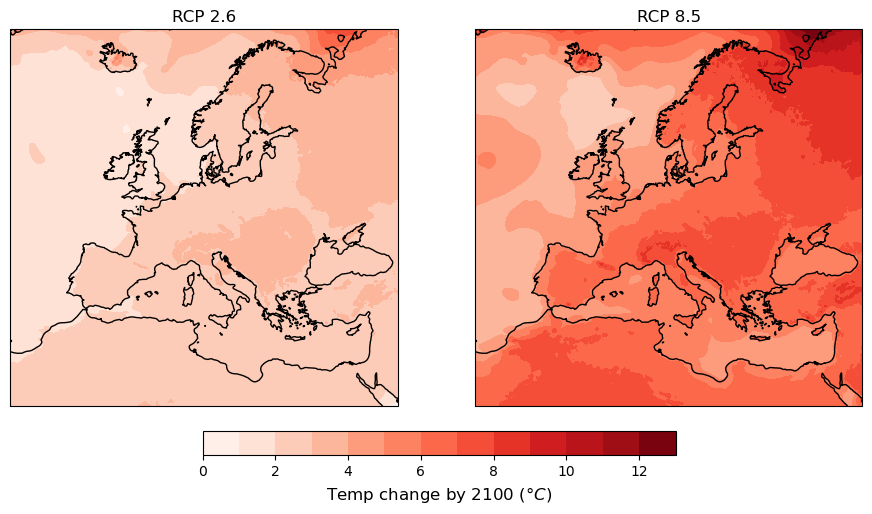

In [29]:
'''
Now let's look at them side by side using a nice contour plot. What do you notice about the 
spatial pattern of warming? Which warms faster - land or the ocean? lowlands or mountainous
regions?
'''

fig, axes = plt.subplots(
    ncols = 2, 
    figsize = (11, 6),
    subplot_kw={'projection': projection}
)

for ax in axes:
    ax.coastlines(resolution="50m")
    #ax.gridlines()
temprange = np.arange(0, 14, 1)
cmap = 'Reds'

im = axes[0].contourf(
    lon, 
    lat, 
    tas26_warming, 
    levels=temprange, 
    transform=transform, 
    cmap=cmap
)
axes[1].contourf(
    lon, 
    lat, 
    tas85_warming, 
    levels=temprange, 
    transform=transform, 
    cmap=cmap
)

axes[0].set_title('RCP 2.6')
axes[1].set_title('RCP 8.5')

# make a nice color bar for both plots
cax = fig.add_axes([0.3, 0.1, 0.43, 0.04])
cb = fig.colorbar(im, cax=cax, orientation='horizontal')
cb.set_label('Temp change by 2100 $(\degree C)$', fontsize = 12)

In [73]:
'''
Let's take a look at how these changes evolve over the course of the century, with a specific
focus on the Pyrenees. Instead of averaging across the time axis, we're now looking to constrain
our data to a particular region and average across the lat / lon dimensions.
'''

def pyrenees(dataset):
    '''cuts out pyrenees region for any dataset and averages across lon/lat'''
    region = dataset.sel(
        rlon = slice(-14, -11), # relative longitude in EUR-11 - coordinates chosen for the Pyrenees region
        rlat = slice(-7.5, -5.8)
    )
    avg = region.mean(dim = ('rlon', 'rlat'))
    return avg

py_hist = pyrenees(tas_hist)[1::] # indexing out first month (Dec 1951) to avoid skewness
py26 = pyrenees(tas26)[1::] # same except Dec 2005
py85 = pyrenees(tas85)[1::]

# calculate annual temperature anomaly for each dataset
anom_hist = py_hist.groupby('time.year').mean() - baseline
anom26 = py26.groupby('time.year').mean() - baseline
anom85 = py85.groupby('time.year').mean() - baseline

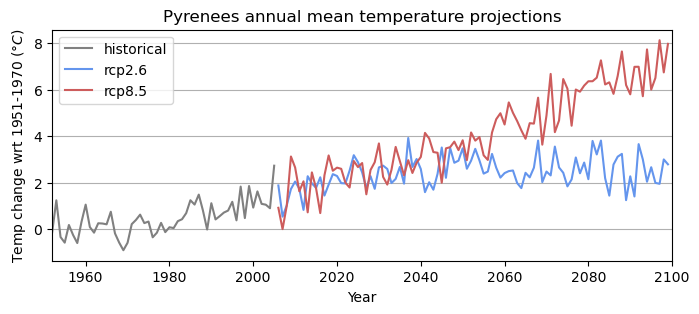

In [74]:
'''
Time to plot! With some nice formatting, of course. What do you notice about the different
emission pathways?
'''

fig = plt.figure(figsize = (8, 3))
ax = plt.axes()

anom_hist.plot(ax=ax, c='grey', label = 'historical')
anom26.plot(ax=ax, c='cornflowerblue', label = 'rcp2.6')
anom85.plot(ax=ax, c='indianred', label = 'rcp8.5')

ax.set_xlim([1952, 2100])
ax.set_ylabel('Temp change wrt 1951-1970 ($\degree C$)')
ax.set_xlabel('Year')
ax.set_title('Pyrenees annual mean temperature projections')
ax.legend()
ax.grid(axis='y')

In [69]:
'''
Lastly, we're going to look at whether these projections have any impact on seasonality. Is
the warming mostly occuring in a particular season? Does winter warm more than summer?
What impact would that have for organisms that depend on the seasons for their natural rhythm?
'''

# once again slice for the baseline period and end of the century, but this time averaging across months
py_baseline = py_hist.sel(time = slice('1952-01-01', '1970-12-30'))
py26_eoc = py26.sel(time = slice('2080-01-01', '2100-12-30'))
py85_eoc = py85.sel(time = slice('2080-01-01', '2100-12-30'))

seasonal_hist = py_baseline.groupby('time.month').mean()
seasonal26 = py26_eoc.groupby('time.month').mean()
seasonal85 = py85_eoc.groupby('time.month').mean()

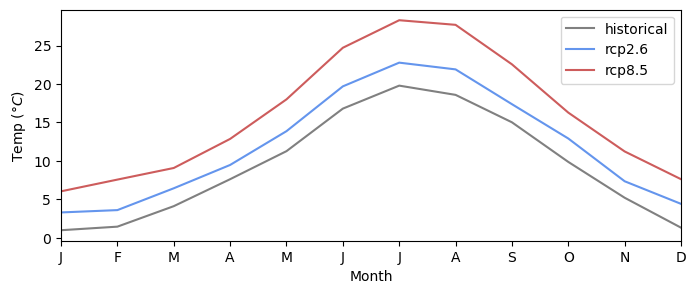

In [70]:
'''
Aaaand last plot. Nothing too surprising here, but some differences between the seasons! Have
a think about how this might impact the parts of the natural environment that you particularly
care about, whether that's flora, fauna, glaciers, etc.
'''

fig = plt.figure(figsize = (8, 3))
ax = plt.axes()

month_nums = np.arange(1, 13)
months = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']

ax.plot(month_nums, seasonal_hist, c='grey', label = 'historical')
ax.plot(month_nums, seasonal26, c='cornflowerblue', label = 'rcp2.6')
ax.plot(month_nums, seasonal85, c='indianred', label = 'rcp8.5')

ax.set_xlim((1, 12))
_ = ax.set_xticks(month_nums, labels = months)
ax.set_xlabel('Month')
ax.set_ylabel('Temp ($\degree C$)')
ax.legend()
